
# pyda testing

Test script to show some examples uses of pyda


In [1]:

import os
import sys

import numpy as np

import pyda

sys.path.insert(0, os.path.abspath('../'))

from pyda.tsdata import TSData
from pyda.dsp.spectral import psd
import numpy

FigSize = (15,10) # global setting for figure size



## Setup matplotlib

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

## Create a time-series object

In [3]:

ts = TSData.randn(nsecs=10000, fs=10, name='ts1', yunits='m')
print(ts)

ts2 = TSData.randn(nsecs=10000, fs=10, name='ts1', yunits='m')/2
print(ts)

ts3 = ts*ts2
ts3.name = 'ts3'


-------- TSData ---------
  name: ts1
  uuid: 0cc80884-ee24-4404-a408-35e188b1ac17
    fs: 10.0
 xaxis: Time=(100000,)[s]
 yaxis: Amplitude=(100000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------
-------- TSData ---------
  name: ts1
  uuid: 0cc80884-ee24-4404-a408-35e188b1ac17
    fs: 10.0
 xaxis: Time=(100000,)[s]
 yaxis: Amplitude=(100000,)[m]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[m]

-----------------------------


## Plot time-series data

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Time $\\left[\\,{\\mathrm{s}} \\right]$', ylabel='Amplitude $\\left[\\,{\\mathrm{m}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

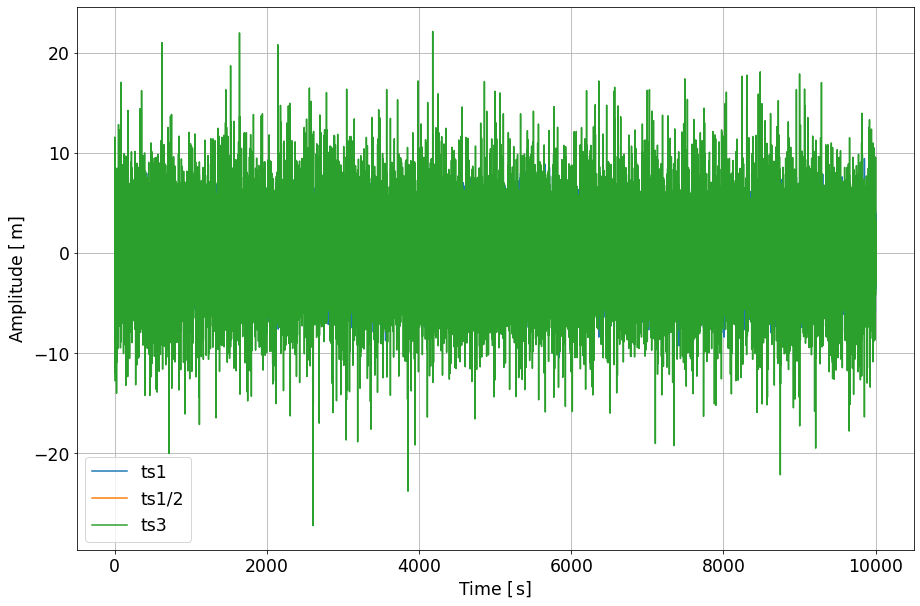

In [4]:
ts.plot(ts2, ts3)

(0.0, 100.0)

<Figure size 1080x720 with 0 Axes>

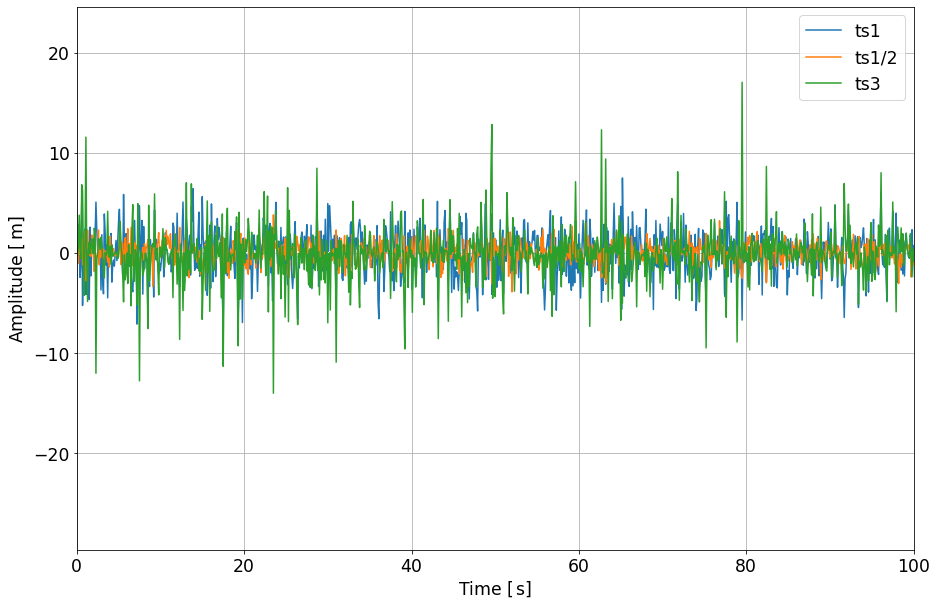

In [5]:
h = ts.plot(ts2, ts3)
h[1][0].set_xlim(0, 100)

## Compute PSD

In [6]:

Pxx = psd(ts)
Pxx2 = psd(ts2)
Pxx3 = psd(ts3)


Processing PSD with segments of length 100000 and overlap of 50000.0 samples (50%)
Processing PSD with segments of length 100000 and overlap of 50000.0 samples (50%)
Processing PSD with segments of length 100000 and overlap of 50000.0 samples (50%)


## Plot PSD

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

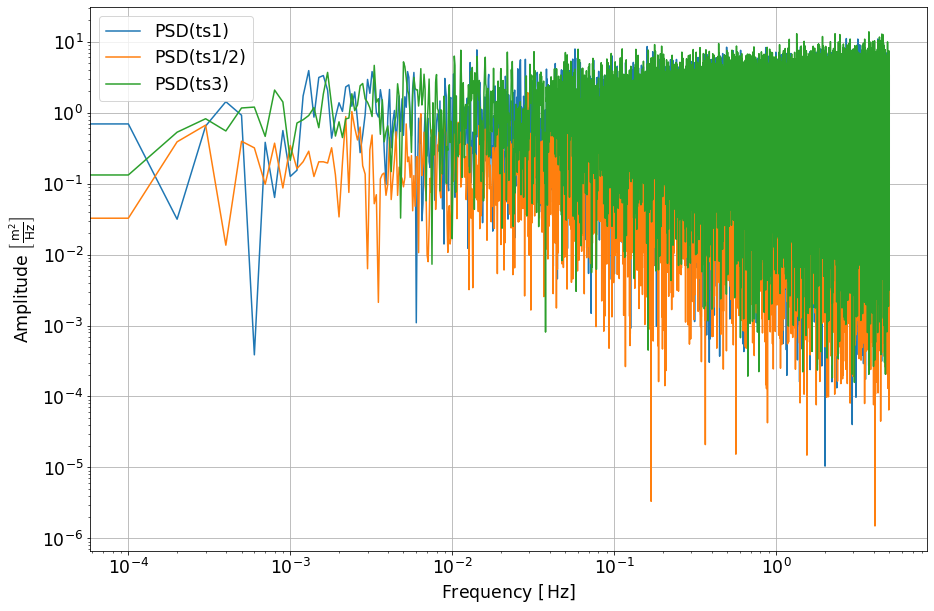

In [7]:
Pxx.loglog(Pxx2, Pxx3)


## Plot ASD

-------- FSData ---------
  name: PSD(ts1)
  uuid: a9aa71d0-50fb-4e9c-adfd-9b5eca19f588
     x: Frequency=(50001,)[Hz]
     y: Amplitude=(50001,)[m^(2)][Hz^(-1)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(0, 0)[m^(2)][Hz^(-1)]

-----------------------------
-------- FSData ---------
  name: sqrt(PSD(ts1))
  uuid: a9aa71d0-50fb-4e9c-adfd-9b5eca19f588
     x: Frequency=(50001,)[Hz]
     y: Amplitude=(50001,)[m][Hz^(-1/2)]
    dx: Frequency=(1,)[Hz]
    dy: Amplitude=(0, 0)[m][Hz^(-1/2)]

-----------------------------


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\sqrt{\\mathrm{Hz}}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

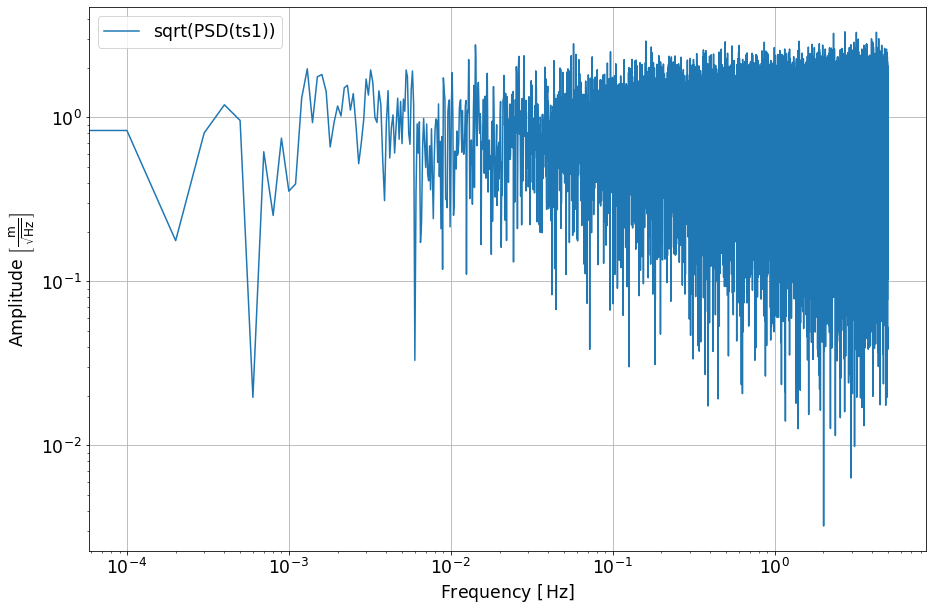

In [8]:
print(Pxx)
Sxx = Pxx.sqrt()
print(Sxx)
Sxx.loglog()

Processing PSD with segments of length 100000 and overlap of 50000.0 samples (50%)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}^{2}}{\\,{\\mathrm{Hz}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

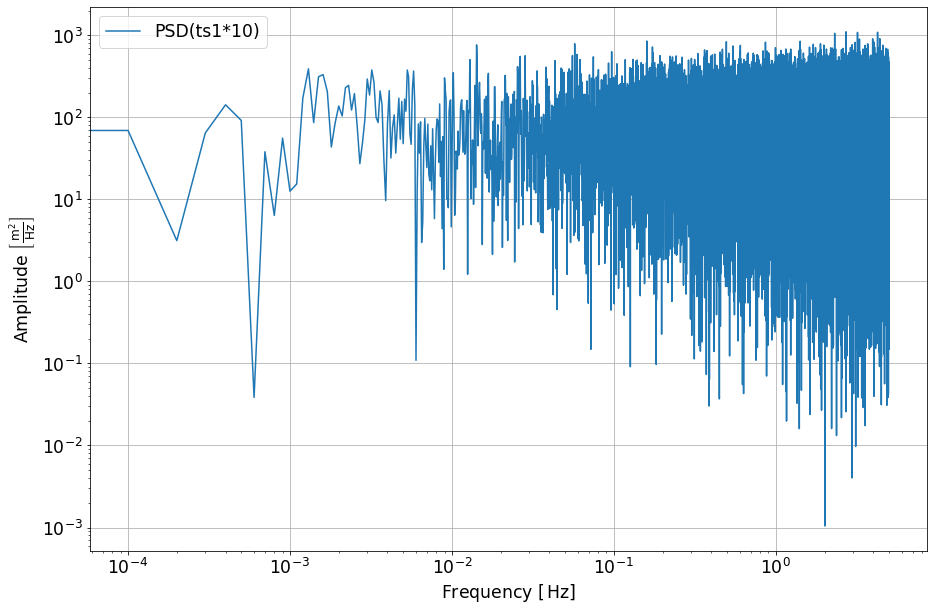

In [9]:
t2 = ts*10
S2 = psd(t2)
S2.loglog()


# Window Types

In [10]:
pyda.specwin.Specwin.supportedWindows()

['Rectangular',
 'Welch',
 'Bartlett',
 'Hanning',
 'Hamming',
 'Nuttall3',
 'Nuttall4',
 'Nuttall3a',
 'Nuttall3b',
 'Nuttall4a',
 'Nuttall4b',
 'Nuttall4c',
 'BH92',
 'SFT3F',
 'SFT3M',
 'FTNI',
 'SFT4F',
 'SFT5F',
 'SFT4M',
 'FTHP',
 'HFT70',
 'FTSRS',
 'SFT5M',
 'HFT90D',
 'HFT95',
 'HFT116D',
 'HFT144D',
 'HFT169D',
 'HFT196D',
 'HFT223D',
 'HFT248D',
 'Kaiser']

## Compute different PSDs

In [11]:
# Specify number of averages
S2 = psd(ts, navs=10, window='BH92')

Sxx.name = "1 av"
S2.name = "10 avs"


Processing PSD with segments of length 24685 and overlap of 16316.0 samples (66.1%)


## Plot multiple PSDs

Processing PSD with segments of length 4762 and overlap of 3147.0 samples (66.1%)


[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\sqrt{\\mathrm{Hz}}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

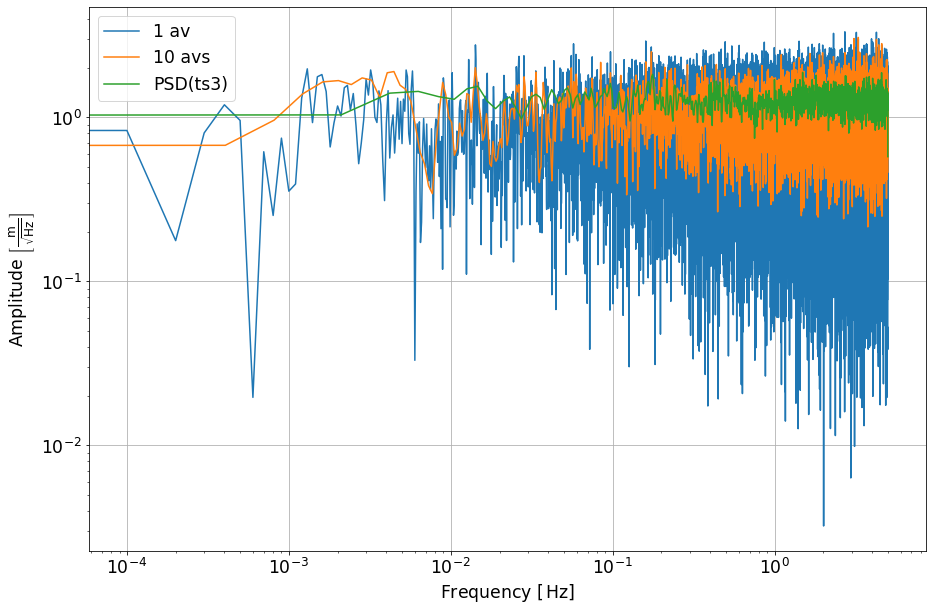

In [12]:


S3 = psd(ts3, navs=60, window='BH92')
Sxx.loglog(S2, S3)


## Compute ASD

In [13]:
ts = TSData.randn(nsecs=10000, fs=10, name='ts1', yunits='m')
S3 = psd(ts, navs=60, window='BH92')
S4 = psd(ts, navs=60, window='BH92', scale='ASD')
S5 = S3.sqrt()
# print(S3)
# print(S4)
# print(S5)
# set print colors
S4.linewidth = 6
S4.color = 'firebrick'
S5.linestyle = '--'
S5.color = 'white'

Processing PSD with segments of length 4762 and overlap of 3147.0 samples (66.1%)
Processing ASD with segments of length 4762 and overlap of 3147.0 samples (66.1%)


## Plot Spectra

[<Figure size 1080x720 with 0 Axes>,
 [<AxesSubplot:xlabel='Frequency $\\left[\\,{\\mathrm{Hz}} \\right]$', ylabel='Amplitude $\\left[\\frac{\\,{\\mathrm{m}}}{\\,{\\sqrt{\\mathrm{Hz}}}} \\right]$'>],
 []]

<Figure size 1080x720 with 0 Axes>

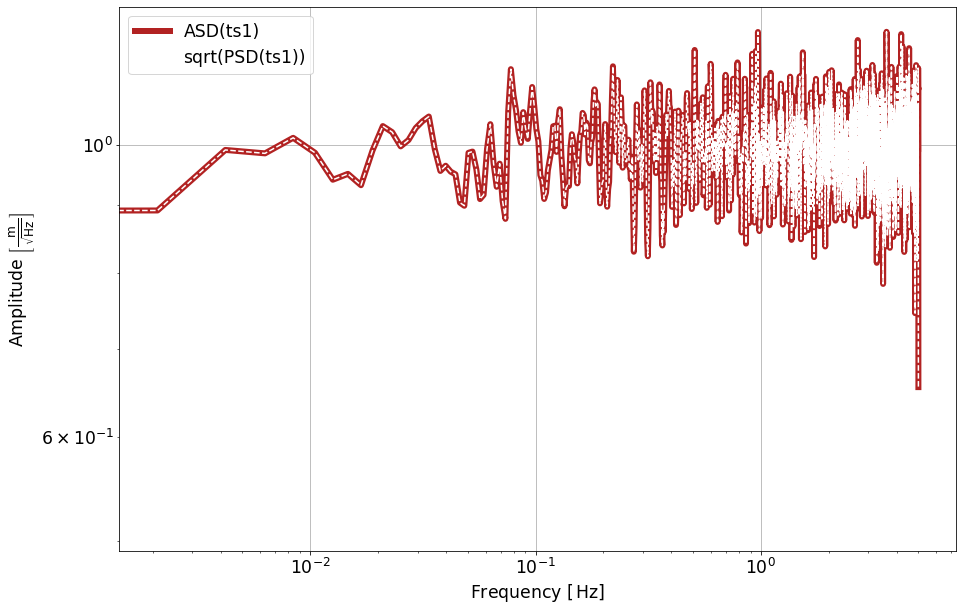

In [14]:

S4.loglog(S5)


In [15]:
u = pyda.unit.Unit('m^2 Hz^-1')
u2 = u.sqrt()
print(u.char())
print(u2.char())


[m^(2)][Hz^(-1)]
[m][Hz^(-1/2)]


## Generate sinewave

-------- TSData ---------
  name: S1
  uuid: 9f518078-c845-4539-b668-59f01d0e98e9
    fs: 100.0
 xaxis: Time=(1000,)[s]
 yaxis: Amplitude=(1000,)[]
    dx: Time=(1,)[s]
    dy: Amplitude=(1,)[]

-----------------------------
[0.1]


<Figure size 1080x720 with 0 Axes>

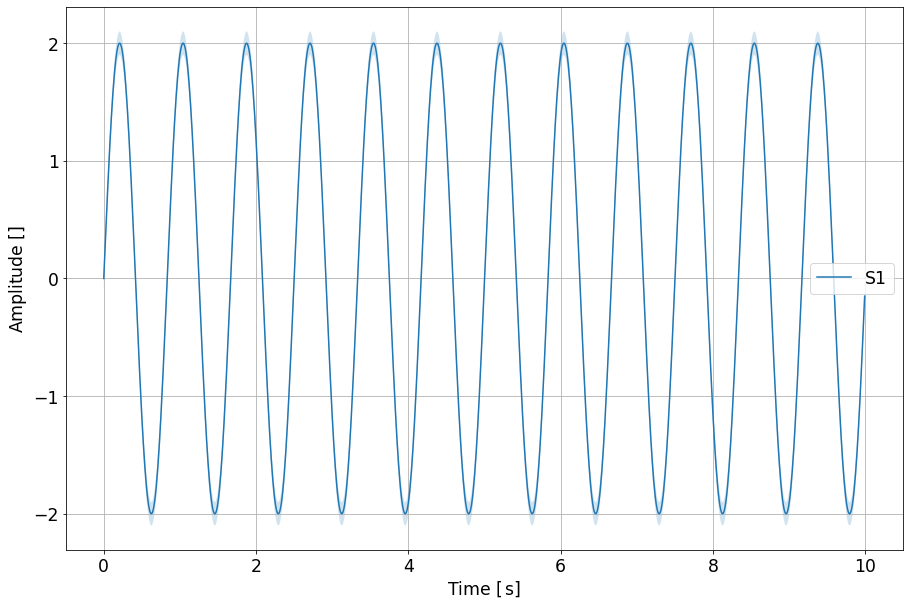

In [18]:

s1 = TSData.sinewave(fs=100, nsecs=10, A0=2, f0=1.2, phi=0, name='S1')
s1.yaxis.ddata=0.1
print(s1)
s1.plot(ShowErrors=True, ErrorType="area")
print(s1.yaxis.ddata)